## 1 Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(19,8.27)})

## 2 Импорт данных

In [2]:
df = pd.read_csv('data.csv')
print('Размерность датасета: ', df.shape)
df.head()

Размерность датасета:  (200, 8)


,rank,name,channel_Info,Category,Posts,Followers,Avg. Likes,Eng Rate
0,1,instagram,brand,photography,7.3K,580.1M,7.31K,0.1%
1,2,cristiano,male,"Health, Sports & Fitness",3.4K,519.9M,3.41K,1.4%
2,3,leomessi,male,"Health, Sports & Fitness",1K,403.7M,0.97K,1.7%
3,4,kyliejenner,female,entertainment,7K,375.9M,7.02K,1.7%
4,5,selenagomez,female,entertainment,1.8K,365.3M,1.85K,1.1%


* **rank** - перечислены учетные записи в порядке их популярности в Instagram, начиная с самой популярной учетной записи
* **name** - отображается дескриптор учетной записи в Instagram, который можно использовать для поиска и подписки на учетную запись в Instagram
* **channel_info** - содержит краткое описание учетной записи, например тип контента, который она содержит, или продукты и услуги, которые она предлагает
* **Category** - категория, по которой учетная запись классифицируется на основе ее основной темы или предмета, например, мода, спорт, развлечения или еда
* **Posts** - общее количество постов на аккаунте. Этот столбец помогает понять уровень активности учетной записи и объем контента, который она создала с течением времени
* **Followers** - количество людей, которые подписаны на аккаунт в Instagram
* **Avg. Likes** - среднее количество лайков, которые посты аккаунта получают на пост
* **Eng Rate** - уровень вовлеченности аккаунта путем деления общего количества полученных лайков и комментариев на общее количество подписчиков, выраженное в процентах

## 3 Предобработка данных

In [3]:
df.dtypes.value_counts()

object    7
int64     1
dtype: int64

In [4]:
df = df.rename(columns={'Avg. Likes': 'avg_likes', 'Eng Rate': 'eng_rate'})
df.head()

,rank,name,channel_Info,Category,Posts,Followers,avg_likes,eng_rate
0,1,instagram,brand,photography,7.3K,580.1M,7.31K,0.1%
1,2,cristiano,male,"Health, Sports & Fitness",3.4K,519.9M,3.41K,1.4%
2,3,leomessi,male,"Health, Sports & Fitness",1K,403.7M,0.97K,1.7%
3,4,kyliejenner,female,entertainment,7K,375.9M,7.02K,1.7%
4,5,selenagomez,female,entertainment,1.8K,365.3M,1.85K,1.1%


Только 1 столбец из 8 имеет числовой формат, необходимо поменять формат во всех столбцах, где это имеет смысл.
Например, в столбцах Posts, Followers, avg_likes, eng_rate.

In [5]:
# Перевод чисел в удобный формат
def rep(lst, type = int):
    return lst.replace({'K': '*1e3', 'M': '*1e6', '%': ''}, regex=True).map(pd.eval).astype(type)

In [6]:
df['Posts'] = rep(df['Posts'])
df['Followers'] = rep(df['Followers'])
df['avg_likes'] = rep(df['avg_likes'])
df['eng_rate'] = rep(df['eng_rate'], float)/100
df.dtypes.value_counts()

object     3
int32      3
int64      1
float64    1
dtype: int64

In [7]:
df.head()

,rank,name,channel_Info,Category,Posts,Followers,avg_likes,eng_rate
0,1,instagram,brand,photography,7300,580100000,7310,0.001
1,2,cristiano,male,"Health, Sports & Fitness",3400,519900000,3410,0.014
2,3,leomessi,male,"Health, Sports & Fitness",1000,403700000,970,0.017
3,4,kyliejenner,female,entertainment,7000,375900000,7020,0.017
4,5,selenagomez,female,entertainment,1800,365300000,1850,0.011


## 4 Визуализация

### 4.1 Самый популярный аккаунт в каждой категории

In [8]:
df.groupby(['Category']).first().sort_values(['Followers'], ascending = False)

,rank,name,channel_Info,Posts,Followers,avg_likes,eng_rate
Category,,,,,,,
photography,1,instagram,brand,7300,580100000,7310,0.001
"Health, Sports & Fitness",2,cristiano,male,3400,519900000,3410,0.014
entertainment,4,kyliejenner,female,7000,375900000,7020,0.017
technology,41,nasa,community,3700,85800000,3690,0.011
fashion,49,gigihadid,female,3300,76400000,3290,0.034
News & Politics,57,narendramodi,male,559,70900000,559,0.033
Lifestyle,83,9gag,community,31000,58100000,31040,0.005
Beauty & Makeup,102,chanelofficial,brand,5100,53500000,5110,0.001
Finance,105,michelleobama,None,691,51900000,691,0.008


### 4.2 Среднее число подписчиков для каждой категории

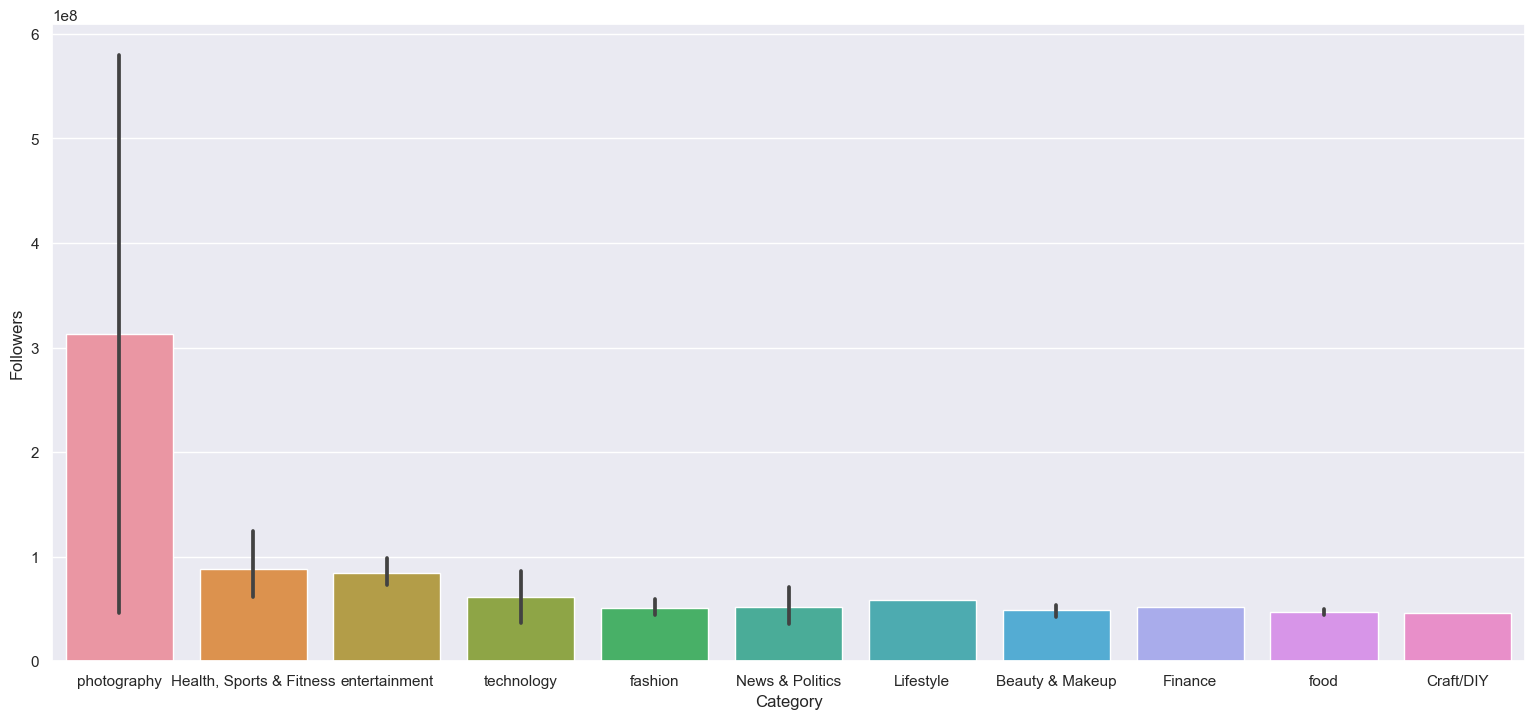

In [9]:
sns.barplot(df, x = 'Category', y = 'Followers')
plt.show()

### 4.3 У кого больше подписчиков в среднем? У мужчин, женщин, сообщества или бренда?

In [10]:
df.groupby(['channel_Info']).mean().sort_values(['Followers'], ascending = False)

,rank,Posts,Followers,avg_likes,eng_rate
channel_Info,,,,,
brand,107.800000,9473.333333,1.087200e+08,9481.333333,0.001800
female,91.581081,3086.513514,9.232838e+07,3086.067568,0.024865
male,103.139785,4522.075269,8.172258e+07,4515.075269,0.027376
community,108.076923,25430.769231,6.231538e+07,25430.000000,0.005923


Больше всего подписчиков у брендов

### 4.4 Есть ли зависимость между количеством постов и средним количеством лайков?

<AxesSubplot: xlabel='Posts', ylabel='avg_likes'>

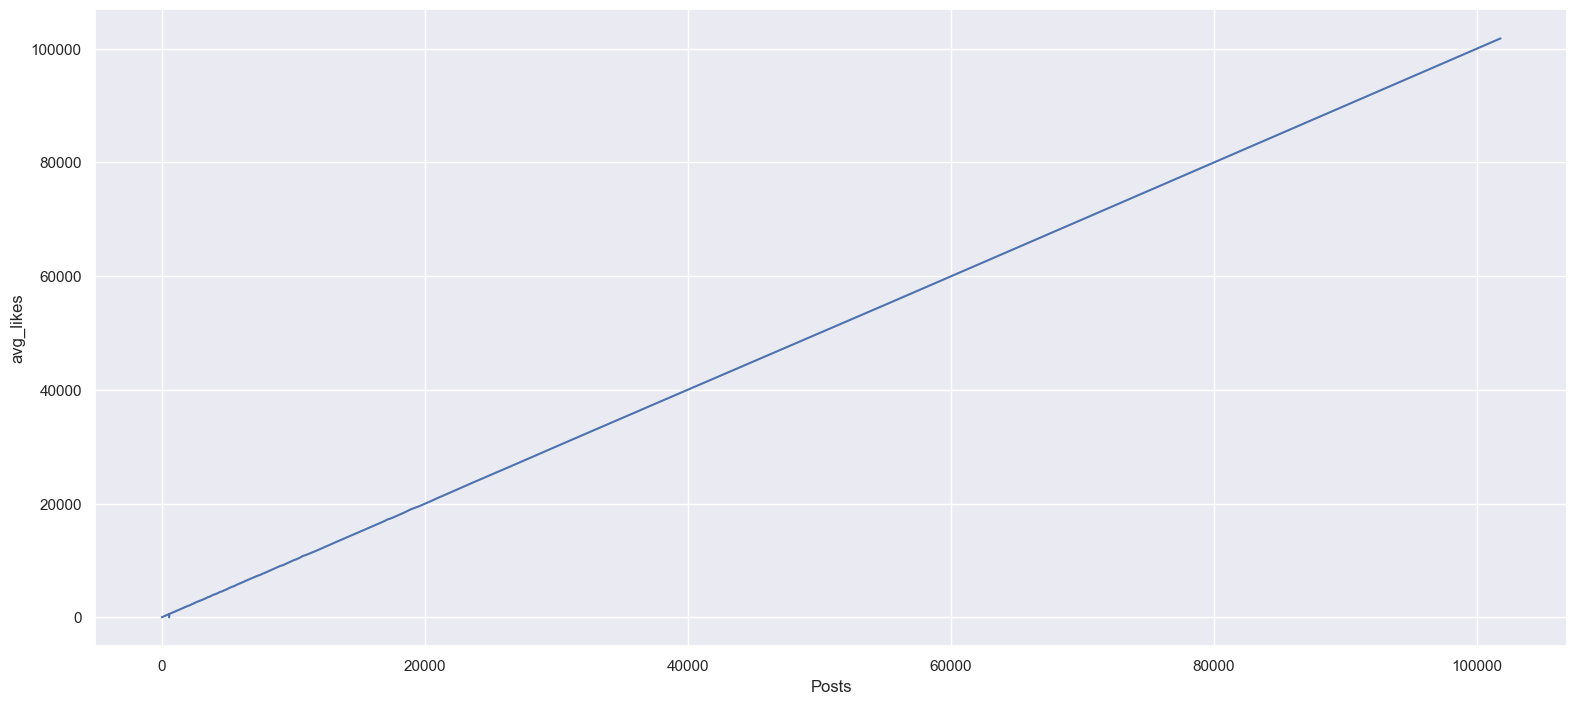

In [11]:
sns.lineplot(df, x = 'Posts', y = 'avg_likes')

In [12]:
df[['Posts', 'Followers']].sort_values(by = 'Followers')

,Posts,Followers
199,4800,34900000
198,7800,35000000
197,6300,35100000
196,1100,35300000
195,16800,35400000
...,...,...
4,1800,365300000
3,7000,375900000
2,1000,403700000
1,3400,519900000


Да, чем больше постов, тем в среднем больше лайков

### 4.5 Самая популярная категория

<AxesSubplot: >

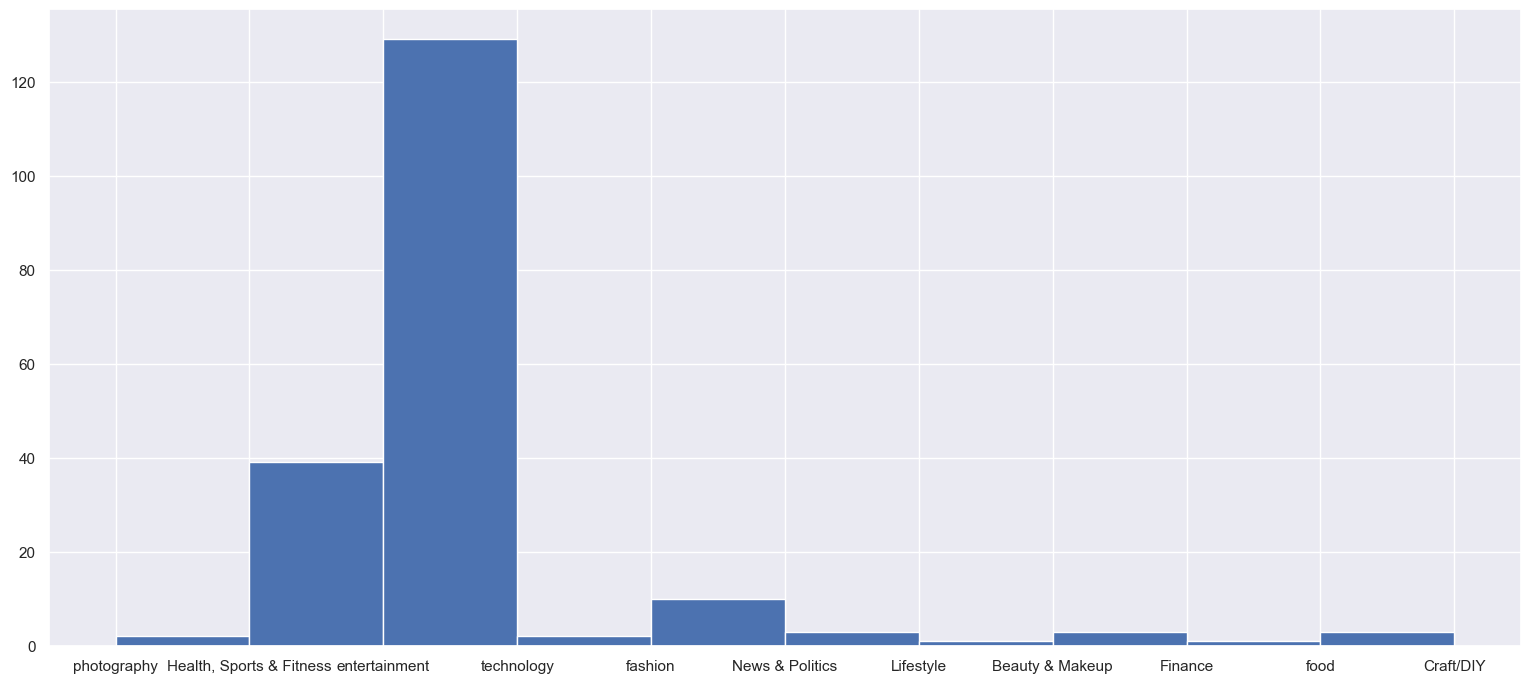

In [13]:
df['Category'].hist()

In [14]:
df.groupby('Category').count()

,rank,name,channel_Info,Posts,Followers,avg_likes,eng_rate
Category,,,,,,,
Beauty & Makeup,3,3,3,3,3,3,3
Craft/DIY,1,1,1,1,1,1,1
Finance,1,1,0,1,1,1,1
"Health, Sports & Fitness",39,39,39,39,39,39,39
Lifestyle,1,1,1,1,1,1,1
News & Politics,3,3,3,3,3,3,3
entertainment,129,129,128,129,129,129,129
fashion,10,10,9,10,10,10,10
food,2,2,2,2,2,2,2


Самая популярная категория - развлечения

### 4.6 Распределение подписчиков среди топ-200

array([[<AxesSubplot: title={'center': 'Followers'}>]], dtype=object)

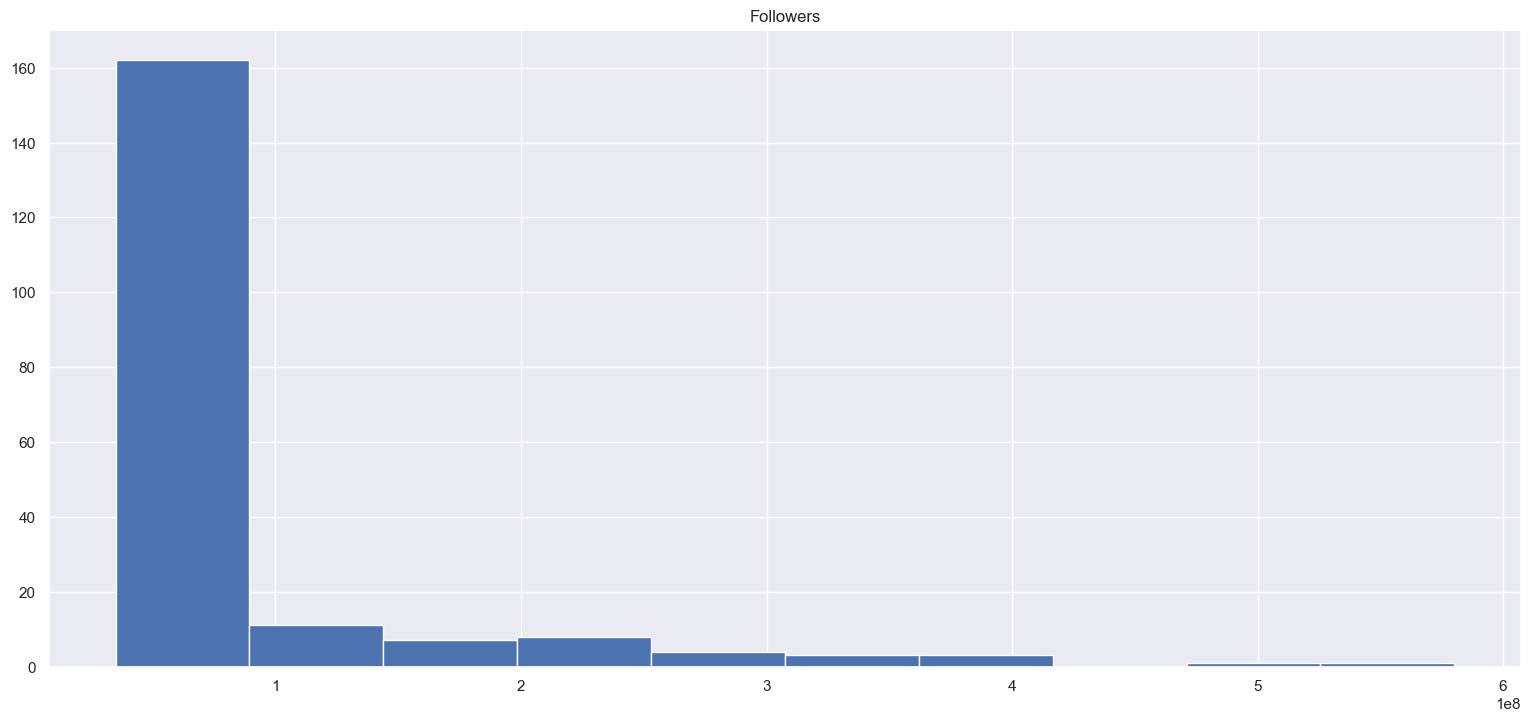

In [15]:
df[['Followers']].hist()

In [16]:
(df['Followers'] < 100_000_000).sum()

164

Только 36 аккаунтов имеют больше 100_000_000 подписчиков

### 4.7 Распределение вовлеченности по категориям

<AxesSubplot: xlabel='Category', ylabel='eng_rate'>

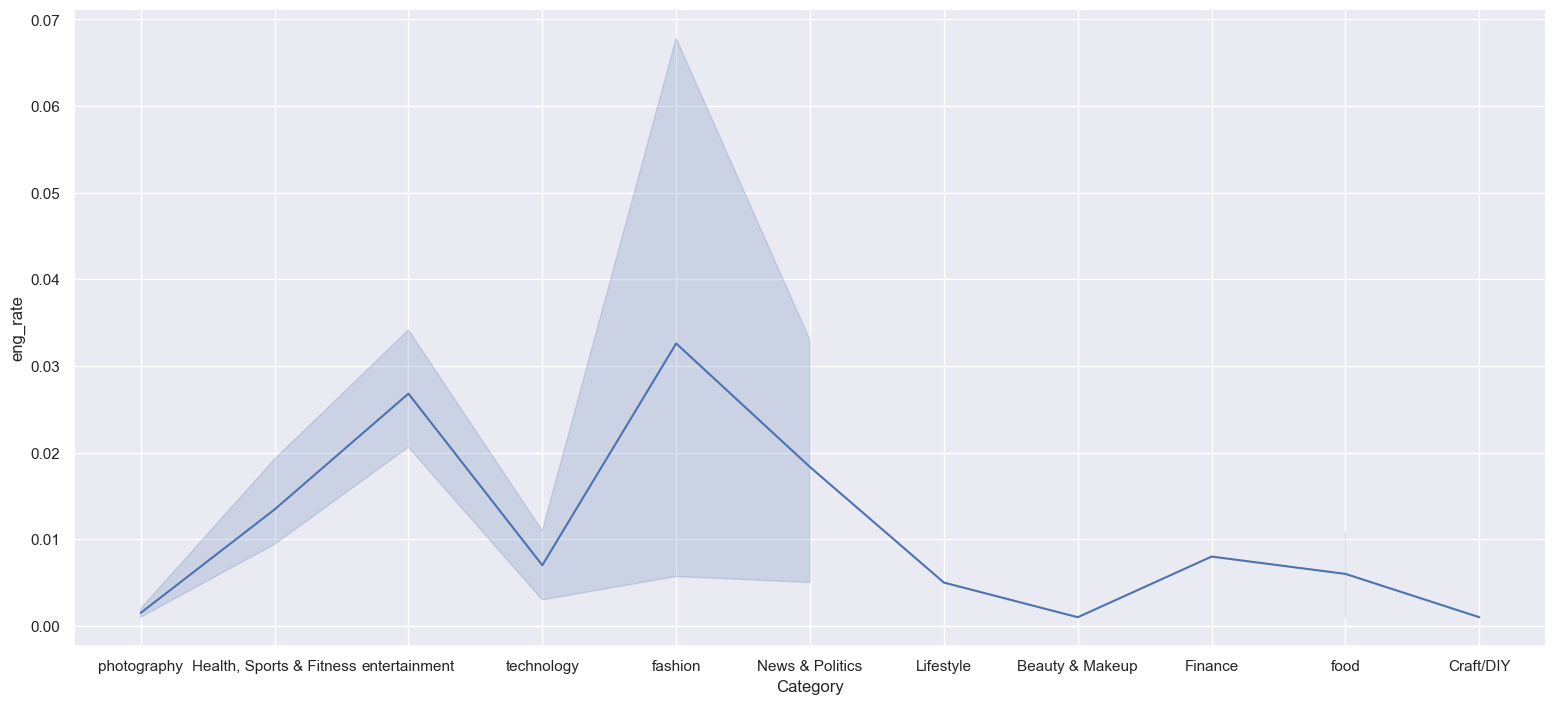

In [17]:
sns.lineplot(df, x = 'Category', y = 'eng_rate')

Лучше всего удерживают аудиторию мода и спорт